<a href="https://colab.research.google.com/github/joseunghan/-/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [2]:
import nltk

자연어 처리에 가장 기본적인 패키지

In [3]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

Os.system() 함수를 이용해서 깃헙에 있는 파일을 복사해서 불러옴> 죄와 벌 파일을 불러옴> 텍스트에 file.read().replace(“/n”,” “) 함수를 이용해서 파일에 있는 내용을 string으로 text에 저장함> file을 write out 하는 것도 가능함

In [4]:
# or copy/pase text here
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [5]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()

In [ ]:
text.split()

Test.split()을 하면 text의 내용을 띄어쓰기를 기준으로 쪼개어 줌> 전형적인 tokenize

In [ ]:
' '.join(text.split())

‘ ‘.join(test.split())> 결합시켜서 다시 원 텍스트로 만들어짐> 이런 tokenize의 단점은 쉼표, 마침표가 포함됨, 이런 것까지도 쪼개서 tokenize를 해보자

In [8]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

nltk의 punkt를 다운로드 받은 뒤 word_tokenize() 함수를 써서 쪼개면 쉼표, 마침표도 따로 토큰으로 잡아서 나눠줌> 그런데 어차피 필요 없음> retokenize() 함수를 이용하면 이런 쉼표나 마침표도 없애줌> 우리는 retokenize() 함수를 쓸 것

string들을 단어 수준으로 끊는 것> string을 길게 들고 있는 것이 아니라 list 안에 단어별로 담아두는 것

### Normalization  
**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출.


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

Lemmertizer> 표제어를 사전을 기준으로 복구를 해냄> 목적에 따라서는 더 정교한 tokenize라고 볼 수도 있음> 

### Stopword

In [18]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place',

Stopword> nltk에서 제공하는 stopword를 다운로드> 이것을 기반으로 해서 처리함> words에서 stop word가 빠진 것을 볼 수 있음

불용어> 대명사, 조동사, 관사는 너무 많이 쓰이는 단어임, 하지만 우리는 이에 대한 관심이 크게 없음, 내용을 가진 단어가 아니기 때문, 분석에 쓸모가 없음> 이런 단어를 모아두는 것

### Collocation, Concordance

Collocation> 연어> 숙어가 대표적인 연어> 같이 나올 확률이 높은 언어> 사람 이름> 사람의 이름과 성이 연어가 될 수도 있다
Concordance> 어떤 특정 단어에 대해서 그 단어의 용례를 보여주는 것

In [14]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


nltk 속에 담겨있는 gutenberg를 다운로드 받아서 사용할 것> 저작권이 지난 text를 모아서 무료로 제공하는 프로젝트임> gutenberg의 모든 텍스트는 string으로 되어 있음> 이 text를 tokenize하는 것이 우리의 목표> retokenize를 이용해서 tokenize 함

In [19]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2)

Mrs Weston; Frank Churchill; Miss Woodhouse; Miss Bates; Jane Fairfax;
Mrs Elton; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; Maple Grove; dare say; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


collocation() 함수를 이용하면 collocation을 보여줌> 대부분 사람의 이름

In [20]:
nltk.Text(words).concordance('Emma', 79, 10)

Displaying 10 of 865 matches:
                                     Emma Jane Austen 1816 VOLUME I CHAPTER I 
                                     Emma Woodhouse handsome clever rich comfo
s friend fond daughters particularly Emma Between _them_ intimacy sisters Even
ther friend friend mutually attached Emma liked highly esteeming Miss Taylor j
rected chiefly The real evils indeed Emma situation power rather much way disp
 grief It wedding day beloved friend Emma first sat mournful thought continuan
hange It true friend going half mile Emma aware great must difference Mrs West
r even half day It melancholy change Emma could sigh wish impossible things ti
al happier spent rest life Hartfield Emma smiled chatted cheerfully could keep
aughter know hearing us He able tell Emma spared exertions maintain happier fl


concordance(‘단어’, 30, 10)은 특정 단어가 사용된 예시를 보여줌> 30개의 캐릭터를 가진 용례 10개를 보여줌

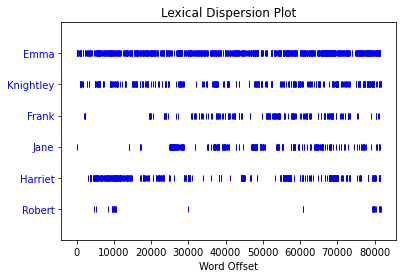

In [21]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

dispersion_plot(단어들)> 특정 단어가 언제 등장하는지를 보여주는 것

In [22]:
# Distributional similarity: 
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")

i harriet she said soon isabella how jane indeed well but shall you
may surprized one miss think it would


similar() 함수는 분포상으로 유사한 것이 무언인가 보여줌> 문장에서 비슷한 위치에 나오는 것들을 찾아줌> Emma의 경우 she 등등이 나옴

In [23]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])

harriet_could like_could away_could possible_could moment_could
said_could


common_context()함수> 어떤 상황에서 두 단어가 같이 나타나기 쉬운지 보여줌

### Frequency distribution, Frequency plot

In [26]:
fd = nltk.FreqDist(words).most_common(20)
fd

[('I', 3178),
 ('Mr', 1153),
 ('Emma', 865),
 ('could', 825),
 ('would', 815),
 ('Mrs', 699),
 ('Miss', 592),
 ('must', 564),
 ('She', 562),
 ('Harriet', 506),
 ('said', 484),
 ('much', 478),
 ('He', 441),
 ('Weston', 439),
 ('one', 413),
 ('It', 400),
 ('every', 398),
 ('thing', 398),
 ('Knightley', 389),
 ('Elton', 385)]

Freqdist().most_common> 어떤 단어가 많이 나오는지 순서대로 횟수와 함께 보여줌> plotting 해서 보여주는 것도 가능

어떤 단어가 많이 쓰였는지를 보는 것이 문서의 특징을 잘 반영해 줄 것> 예를 들어 pitcher라는 단어가 많이 나온다면 야구와 관련된 내용일 것

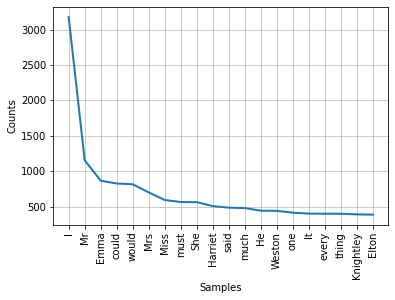

In [27]:
nltk.Text(words).plot(20)

### Dictionary

In [28]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [29]:
len(nltk.corpus.words.words('en'))

235886

### Extract information (pos tag, named entity)


#### **POS tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [30]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [31]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [32]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


Pos tag> .pos_tag(words)> 함수를 통해서 tokenize된 words의 품사를 보여줌

Pos tag> 품사> 문장을 넣으면 품사를 자동으로 분석해주는 것

### Wordcloud

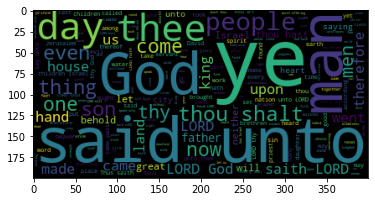

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

한달 전 신문 기사에서는 대선이라는 단어가 많이 나왔을 것, 그 후로는 대선이라는 말이 확 줄어들었을 것> 글자의 크기로 빈도를 visualize 해주는 것

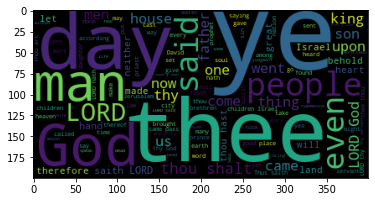

In [34]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)

Wordcloud> 빈도를 기반으로해서 폰트 사이즈와 관련이 있음> 많이 나올수록 더 큰 폰트로 표시됨> Stopwords에 추가를 하는 것도 가능> stopwords에 unto와 stopwords가 빠져 있는 것을 볼 수 있음

### Regular expression

In [35]:
import re

regular expression에 필요한 패키지

In [36]:
re.search('bc', 'abcdefa')

<re.Match object; span=(1, 3), match='bc'>

오른쪽에 있는 항에 대해서 왼쪽의 항을 찾으라는 뜻
제일 처음 발견되는 부분에 대해서 표시해줌

In [37]:
re.findall('a', 'abcdefa')

['a', 'a']

오른쪽 항에 대해서 왼쪽 항을 모두 찾아줌, string에서 다 찾아서 list로 만들어줌, 매우 유용함

In [38]:
re.sub('a', 'b', 'abcdefa')

'bbcdefb'

세번째 항의 string에서 첫번째 항의 내용을 두번째 항의 내용으로 바꾸는 함수

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

직접적으로 입력을 주어서 찾게할 수도 있지만 규칙을 주어서 찾는 것이 가능함

In [40]:
nltk.download('words')
engdict = nltk.corpus.words.words('en')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


영어 사전을 불러옴, 리스트의 형태로 받아짐

In [41]:
result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)]
print(result[:10])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


engdict라는 리스트의 아이템을 하나씩 w로 받아서 그 갯수 만큼 for루프를 돌림, 이때 w가 ed가 string의 끝에 위치하는 string이면 if절을 통과해 result에 저장되는 것

In [42]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything']


위의 규칙을 가지고 wsj(신문)에서 단어를 찾는 것
sort를 해줌으로써 나온 순서가 아닌 정리된 순서로 나오게 됨
re.search는 있기만 하면 걸러주는 역할

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text

프렌즈 시즌1 스크립트의 파일을 불러옴

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'
sent = re.findall(pattern, text)
sent
text = '\n'.join(sent)

이런 긴 텍스트를 찾을 때 유용한 것이 findall, findall은 규칙에 해당되는 것은 모두 찾아서 list화 해줌
(?<=: ).+(?=[\.|\?|\!])> 왼쪽에 : 가 있고 오른쪽에 .,!,?가 있는 하나 이상의 캐릭터를 찾아라, 즉 왼쪽과 오른쪽의 환경을 정해주는 것

In [ ]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()

주어진 string을 파일로 만들어주는 것

fiends season1 text 중에서 ross 부분을 re.sub 나의 학번으로 바꾸고 텍스트로 저장을 하면 됨, 20220509.ipynb 파일을 깃허브로 만들고 20220509.txt가 코드의 결과로 나오면 됨 이번주 수요일 수업시간 이전까지